# AIRLINE PASSENGER (TIME SERIES) PREDICTION USING LSTM

We will use Airline Passenger dataset for this project. This dataset provides monthly totals of a US airline passengers from 1949 to 1960. You can download the dataset from Kaggle link below: 
https://www.kaggle.com/chirag19/air-passengers

We will use LSTM deep learning model for this project. The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation through time and overcomes the vanishing gradient problem. LSTM can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results. Instead of neurons, LSTM networks have memory blocks that are connected through layers.

#### Aim of the project:

Given the number of passengers (in units of thousands) for last two months, what is the number of passengers next month? In order to solve this problem we will build a LSTM model and train this model with our train data which is first 100 months in our dataset. After the LSTM model training finishes and learn the pattern in time series train data, we will ask it the above question  question and get the answer from it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']


In [4]:
type(data)

pandas.core.series.Series

In [5]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

My data fromat is Series, but I need 2D array for MinMaxScaler() and my other methods to work. So I will change to numpy array and reshape it.

In [6]:
data=np.array(data).reshape(-1,1)

In [7]:
type(data)

numpy.ndarray

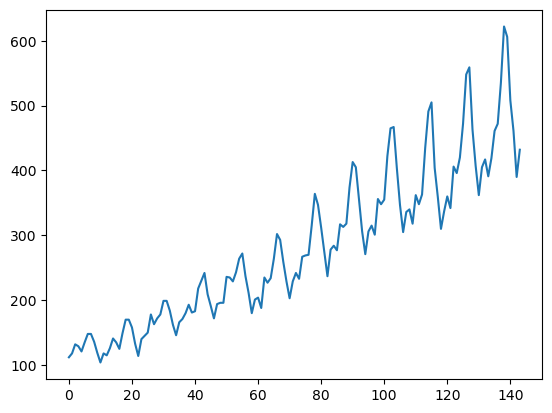

In [8]:
plt.plot(data)
plt.show()

### Scaling..

LSTM is sensitive to the scale of the input data. So we will rescale the data to the range of 0-to-1, also called normalizing. 

In [9]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### Train, Test split

In [10]:
len(data)

144

I have 144 data. I will use 90 of it as train set and 54 as test set..

In [11]:
train = data[0:90,:]
test = data[90:,:]

In [12]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
steps = 2


In [14]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)




In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [16]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=1)

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

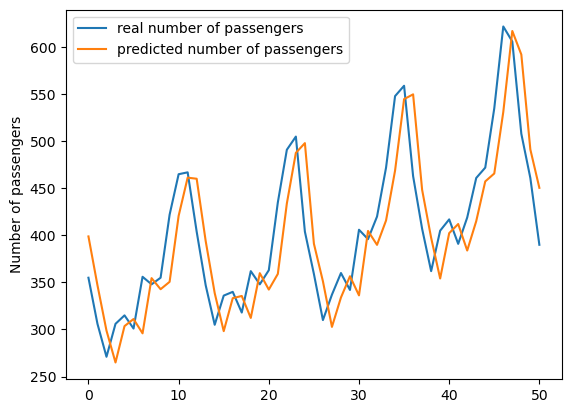

In [21]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()